# 1. Introduction  
Game Winner is a brazilian sports betting company that is very successful in making the right bets and teaching how to bet on sports and you can find their website here: https://gamewinner.com.br/  
Since one of its co-founders, Rodrigo Mota (https://www.linkedin.com/in/rodrigo-mota-358b939a/), is a dear friend of mine for many years now, I asked if he could provide me their data to run some analysis for him, and he promptly did so.  
Of the several sports, this analysis is for bettings on basketball games.  
First, we begin importing what is necessary for the project:

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pathlib as pl
%matplotlib inline
sns.set()

# 2. Initial Data Analysis  
Right now we import the table into a dataframe and display its content and info:

In [24]:
path = pl.Path (f"../input/sports/basquete.csv")
basquete_df = pd.read_csv(path)
basquete_df.columns = basquete_df.columns.str.strip()
basquete_df

,Data,Liga,Entrada,Fundamento,Investimento,Odd,Ganho,Resultado
0,2022-07-01,WNBA,"Storm -5,5 e Indiana ab. 80,5 pts",Handicap,10,1.44,4.40,Green
1,2022-07-01,WNBA,LV Aces,Vencedor,10,1.57,5.70,Green
2,2022-07-01,WNBA,"Wilson ac. 9,5 reb",Rebotes,10,1.85,8.50,Green
3,2022-07-01,Internacional,Canadá -7,Handicap,10,1.83,8.30,Green
4,2022-07-02,WNBA,"Mercury ab. 83,5 pts",Total,10,1.50,5.00,Green
...,...,...,...,...,...,...,...,...
1162,2022-12-06,NBA,Nuggets,Vencedor,10,1.54,5.40,Red
1163,2022-12-06,NBA,"Doncic ac. 2,5 3pt",3 pontos,10,1.74,7.40,Green
1164,2022-12-06,NBA,"Pistons x Heat ab. 104,5 pts 1T",Total,10,1.50,5.00,Green
1165,2022-12-06,NBA,Lakers 30 pts,Não marcar,10,1.55,5.50,Red


In [25]:
basquete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          1167 non-null   object 
 1   Liga          1167 non-null   object 
 2   Entrada       1167 non-null   object 
 3   Fundamento    1167 non-null   object 
 4   Investimento  1167 non-null   int64  
 5   Odd           1167 non-null   float64
 6   Ganho         1167 non-null   float64
 7   Resultado     1167 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.1+ KB


No null values is a great start.  
But the column called Data is supposed to be date-time type, so let's convert it.  
Furthermore, removing any accidental white spaces before and after every row in the Entrada column seems like a good idea to potentially identify duplicated values.

In [26]:
basquete_df.Data = pd.to_datetime(basquete_df.Data)
basquete_df.Entrada = basquete_df.Entrada.str.strip().str.lower()
basquete_df.duplicated().sum()

0

Another good news: no duplicated entries.  
Let's see how much unique values there are.

In [27]:
basquete_df.nunique()

Data             111
Liga              13
Entrada         1029
Fundamento        34
Investimento       5
Odd               60
Ganho             58
Resultado          3
dtype: int64

Strangely Resultado has 3 unique values when it's supposed to have only 2.

In [28]:
basquete_df.Resultado.value_counts(normalize=True)

Green    0.592973
Red      0.406170
red      0.000857
Name: Resultado, dtype: float64

There is just a difference in capital letters and an easy fix for that.  
Let me advance by checking Liga column, where the league names are.

In [29]:
basquete_df.Resultado = basquete_df.Resultado.str.strip().str.lower()
basquete_df.Liga.value_counts()

NBA               811
WNBA              120
Eurobasket         74
Copa do Mundo      61
Internacional      46
Pré NBA            30
Americup            7
Nacional            6
NBB                 6
NCAA                3
NBA SL              1
Esports             1
Euroliga            1
Name: Liga, dtype: int64

Ok, I'm going to get together all leagues with less than 20 occurrences into Outras value (which means others).  
Then I proceed to the Fundamento column, where the criterias reside.

In [30]:
aux = basquete_df.Liga.value_counts()
for kind in aux.index:
    if aux [kind] < 20:
        basquete_df.loc [basquete_df.Liga == kind, "Liga"] = "Outras"
basquete_df.Fundamento.value_counts()

Handicap                 221
Total                    176
Pontos                   175
Assistências              97
Rebotes                   89
3 pontos                  74
Vencedor                  67
Time Total                64
Dupla                     35
Primeiro a marcar         30
Ast + Reb                 15
Tripla                    14
Under                     13
Roubos                    11
Tocos                     10
Assistencias              10
Pts + Reb + Ast           10
Turnovers                 10
Nenhum a marcar            7
Não marcar                 7
Over                       6
Total Over                 4
Total                      3
Ambos marcarem             3
Nenhum marcar              3
Pts + Reb                  2
Primeiro a Marcar          2
Total Under                2
3 Pontos                   2
1º Quarto                  1
Roubadas + Tocos           1
Pts + Reb                  1
Ambos não marcarem         1
Primeiro a não marcar      1
Name: Fundamen

According to the data owner, a lot of criterias means the same thing.  
Moreover I will gather all those with less than 20 occurrences into one value only, called outros (which means others).

In [31]:
basquete_df.Fundamento = basquete_df.Fundamento.str.strip().str.lower()
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('assistencias', 'assistências', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('nenhum marcar', 'ambos não marcarem', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('nenhum a marcar', 'ambos não marcarem', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('primeiro a não marcar', 'ambos não marcarem', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('total over', 'total', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('over', 'total', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('total under', 'total', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('under', 'total', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('time total', 'total', regex=False)
basquete_df.Fundamento = basquete_df.Fundamento.str.replace('1º quarto', 'pontos', regex=False)
aux = basquete_df.Fundamento.value_counts()
for kind in aux.index:
    if aux [kind] < 20:
        basquete_df.loc [basquete_df.Fundamento == kind, "Fundamento"] = "outros"
basquete_df.shape

(1167, 8)

# 3. Exploratory Data Analysis  
Time for a deeper analysis has come.  
Starting by counting the betting values distribution.

In [32]:
basquete_df.Investimento.value_counts(normalize=True)

10    0.984576
1     0.011997
5     0.001714
20    0.000857
2     0.000857
Name: Investimento, dtype: float64

We can see that more than 98% is from a betting value of 10.  
And how about the league and the criteria distribution?

<AxesSubplot:xlabel='count', ylabel='Liga'>

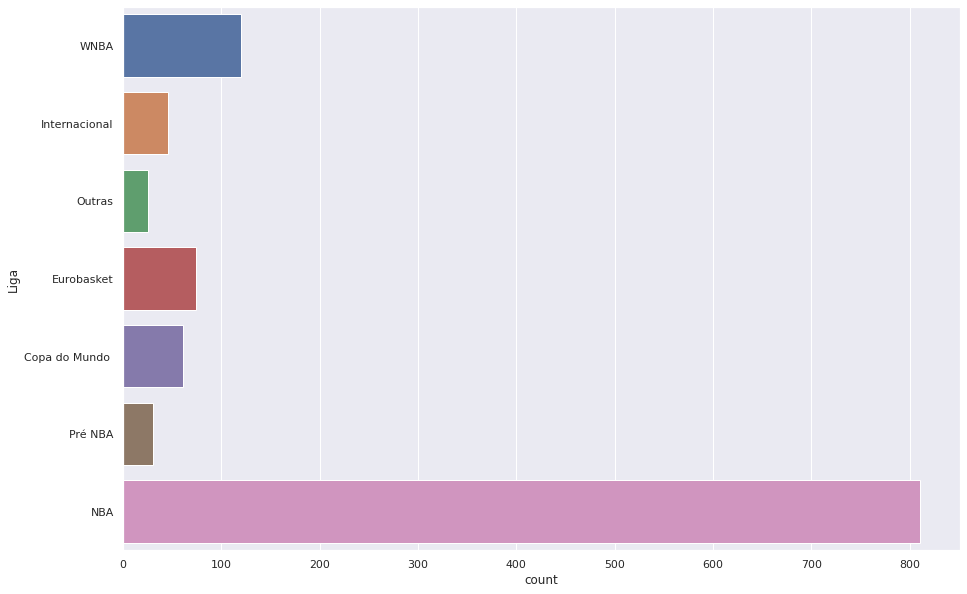

In [33]:
plt.figure (figsize = (15,10))
sns.countplot(y='Liga', data=basquete_df)

<AxesSubplot:xlabel='count', ylabel='Fundamento'>

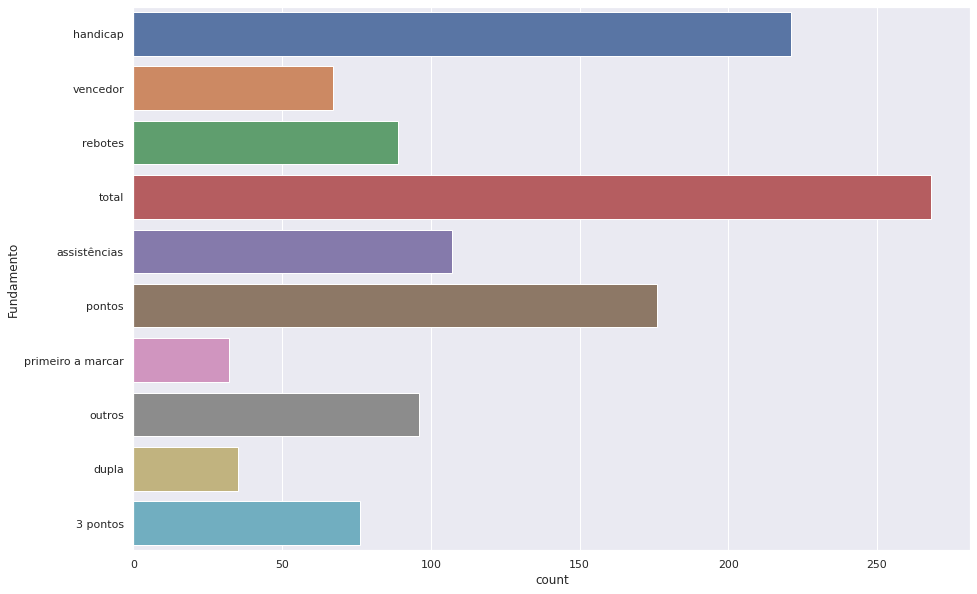

In [34]:
plt.figure (figsize = (15,10))
sns.countplot(y='Fundamento', data=basquete_df)

A great idea is breaking down those occurrences according to the results they got:

<AxesSubplot:xlabel='count', ylabel='Liga'>

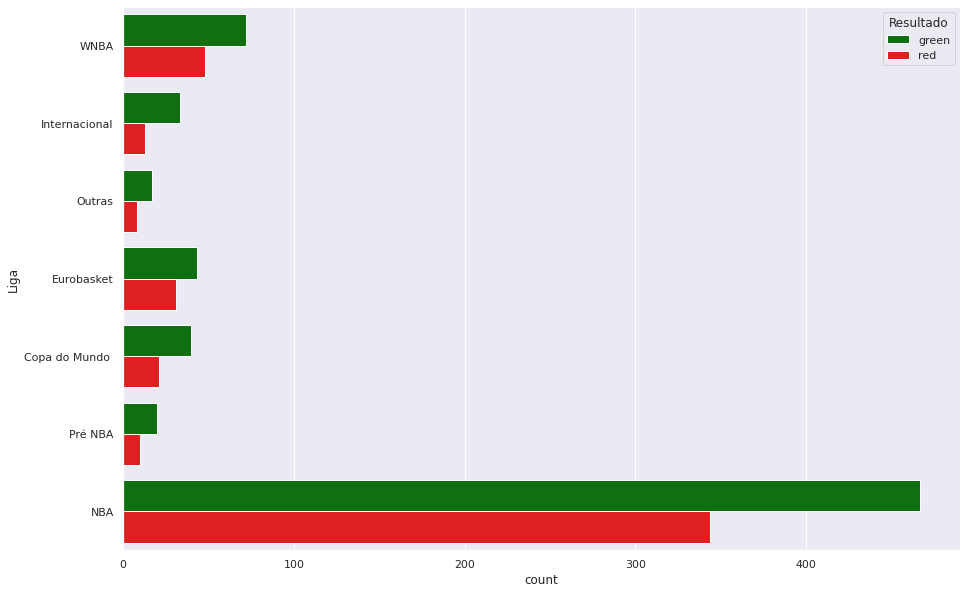

In [35]:
colors = ['Green', 'Red']
plt.figure (figsize = (15,10))
sns.countplot(y='Liga', hue='Resultado', data=basquete_df, palette=colors)

<AxesSubplot:xlabel='count', ylabel='Fundamento'>

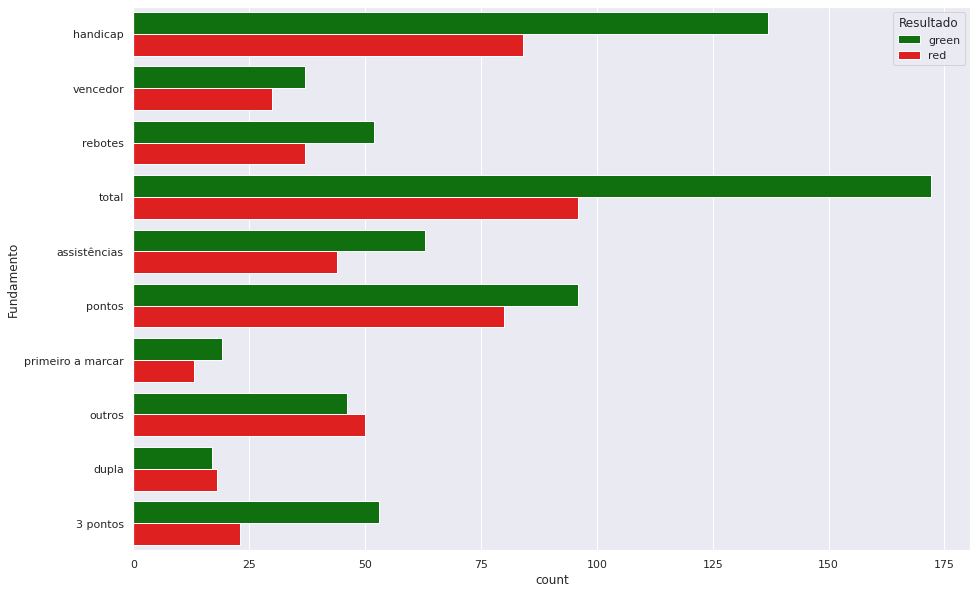

In [36]:
plt.figure (figsize = (15,10))
sns.countplot(y='Fundamento', hue='Resultado', data=basquete_df, palette=colors)

At this moment I want to view their performance over time:

<AxesSubplot:xlabel='Data', ylabel='Count'>

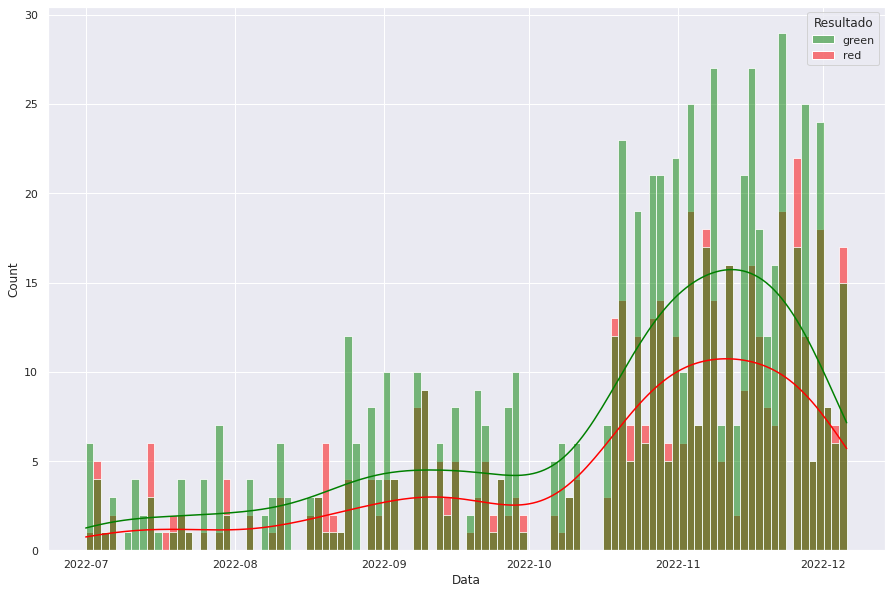

In [37]:
plt.figure (figsize = (15,10))
sns.histplot(x='Data', hue='Resultado', data=basquete_df, bins=100, kde=True, palette=colors)

They are consistently achieving more positive than negative outcomes.  
As we could verify in the middle of the section 2, something around 60% : 40%.  
I wonder if a deep learning model could predict their result even before placing a bet.

# 4. Encoding  
Let us start importing and initializing what is needed to prepare the environment: 

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
encoder = OneHotEncoder(sparse = False)
es = EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True)

Then I'll need a function to plot loss and accuracy graphs and another one to create the model:

In [39]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,0.7))
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=2)
    ax[0].grid(axis="y",linewidth=2)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].set_ylim((0,1.1))
    ax[1].grid(axis="x",linewidth=2)
    ax[1].grid(axis="y",linewidth=2)
    
    if title:
        fig.suptitle(title)

In [40]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    
    model = models.Sequential()

    model.add(layers.Dense(30, activation='relu', input_dim=X_train.shape[1]))
    model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dropout(rate=0.1))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy') 

    return model

It's almost ready.  
But first we must encode the columns so the model can learn properly.  
This means transforming what is currently text into numbers the model can understand.

In [41]:
X = pd.DataFrame (encoder.fit_transform(basquete_df.drop_duplicates()[['Liga', 'Fundamento']]), columns=np.concatenate(encoder.categories_, axis=0))
X

,Copa do Mundo,Eurobasket,Internacional,NBA,Outras,Pré NBA,WNBA,3 pontos,assistências,dupla,handicap,outros,pontos,primeiro a marcar,rebotes,total,vencedor
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1163,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y = np.where (basquete_df.drop_duplicates().Resultado == "Green", 1, 0)
y

array([0, 0, 0, ..., 0, 0, 0])

# 5. Modeling  
I'm going to perform a cross validation and plot some graphics of the model's performance, as well as show its final average accuracy and standard deviation.  
A cross validation is a statistical method that takes a different fold each time to train and test from the entire dataframe so we can evaluate and compare whether the model is reliable throughout all values.

Fold 1:
10/10 [==============================] - 0s 2ms/step - loss: 6.1964e-25 - accuracy: 1.0000
Fold 2:
10/10 [==============================] - 0s 2ms/step - loss: 4.8533e-20 - accuracy: 1.0000
Fold 3:
10/10 [==============================] - 0s 2ms/step - loss: 2.9054e-10 - accuracy: 1.0000
Fold 4:
10/10 [==============================] - 0s 2ms/step - loss: 2.4667e-22 - accuracy: 1.0000
CPU times: user 4min 28s, sys: 34.1 s, total: 5min 2s
Wall time: 4min 37s


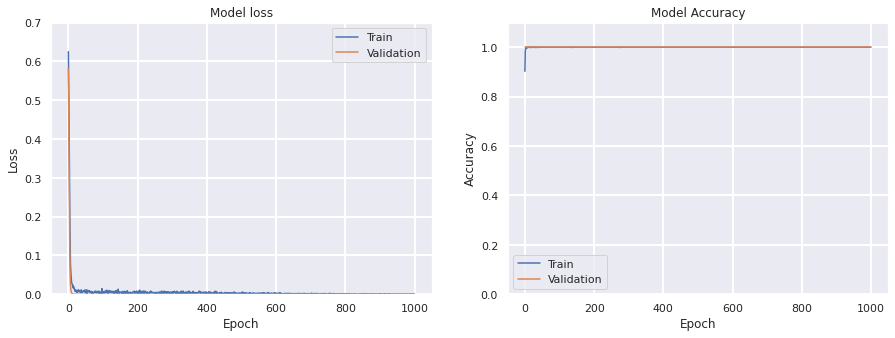

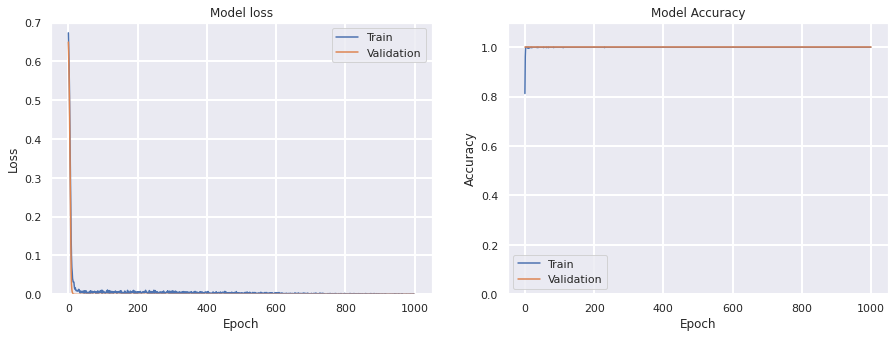

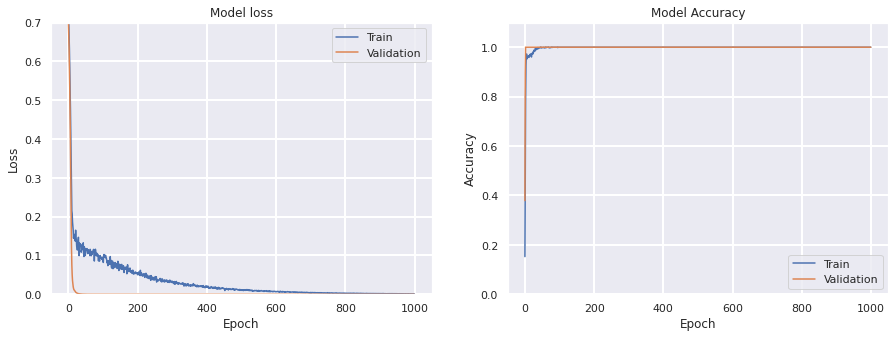

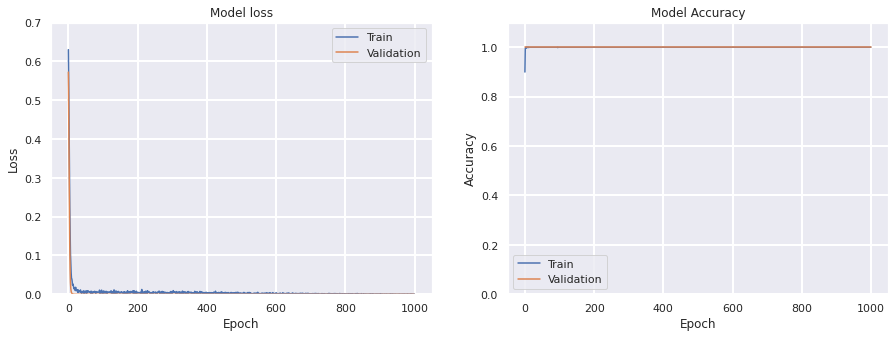

In [43]:
%%time
results = []
for i, (train_index, test_index) in enumerate(KFold(n_splits=4, shuffle=True).split(X)):
    print(f"Fold {i+1}:")
    
    # Split the data into train and test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize the model
    model = initialize_model()
    
    # Fit the model on the train data
    model.fit (X_train, y_train, validation_split=0.25, batch_size=64, epochs=1000, callbacks=es, use_multiprocessing=True, verbose=0)
    
    # Plot loss and accuracy
    plot_loss_accuracy(model.history)
    
    # Evaluate the model on the test data
    results.append(model.evaluate(X_test, y_test))

In [44]:
print(f'Average accuracy : {np.mean([item[1] for item in results])*100:.2f}% (±{np.std([item[1] for item in results])*100:.2f})')

Average accuracy : 100.00% (±0.00)


# 6. Conclusion  
We have successfully built a model that can theoretically predict with 100% accuracy  whether the company bettings on basketball games will become a win or a loss beforehand.  
Of course, only using it in real world cases from now on, we can adjust and improve if necessary.